In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_datasets
    Found existing installation: tensorflow-datasets 4.8.2
    Uninstalling tensorflow-datasets-4.8.2:
      Successfully uninstalled tensorflow-datasets-4.8.2


In [ ]:
from __future__ import absolute_import, division, print_function

#import tensorflow and tensorflow dataset
import tensorflow.compat.v1 as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

#this will go away in the future
#if this gives an error, you might be running tensorflow 2 or above
#if so, the just comment out this line and run this cell again
tf.enable_eager_execution()

2.11.0


In [ ]:
dataset, metadata=tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLVK5LZ/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLVK5LZ/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training exapmples: " +str(num_train_examples))
print("Number of testing exapmples: " +str(num_test_examples))

Number of training exapmples: 60000
Number of training exapmples: 10000


**Preprocess the data**

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32) #the value of each pixel in the data is an integer in the range [0,255] so we normalize it tp [0,1].
  images /= 255
  return images, labels

# the map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)

**Explore the processed data**

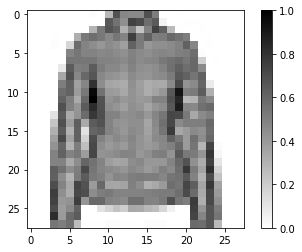

In [ ]:
#Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))
 
#plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

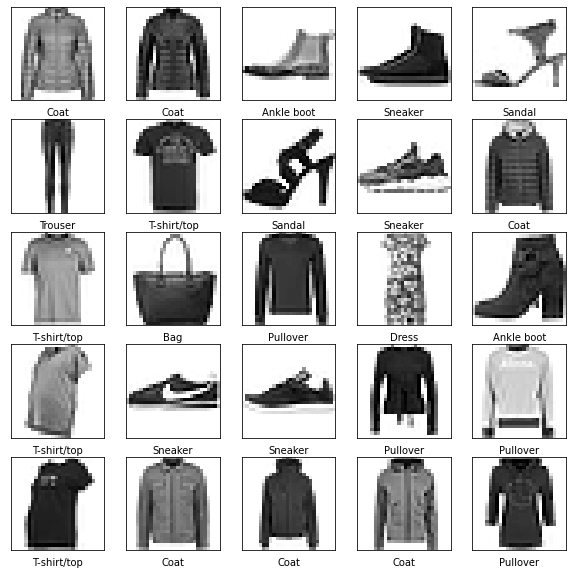

In [ ]:
plt.figure(figsize=(10,10))
i =0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel( class_names[label])
  i += 1
plt.show()

**Build a Model**

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,input_shape=(28,28,1)),
   tf.keras.layers.MaxPooling2D((2,2), strides=2),
   tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu),
   tf.keras.layers.MaxPooling2D((2,2),strides=2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation=tf.nn.relu),
   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compile a Model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE) #repeat means that the iteration to be done for infinte time
test_dataset = test_dataset.batch(BATCH_SIZE)                        
# BATCH SIZE is used is a an example. it speed up the training process
# shuffle it randomize all the order of all the examples

In [ ]:
model.fit(train_dataset, epochs = 100, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))  # epoch is used to find the termination 

Epoch 1/100
1875/1875 [==============================] - 28s 7ms/step - loss: 0.3950 - accuracy: 0.8585
Epoch 2/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2567 - accuracy: 0.9064
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2135 - accuracy: 0.9207
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1769 - accuracy: 0.9357
Epoch 5/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1514 - accuracy: 0.9435
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1299 - accuracy: 0.9519
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1081 - accuracy: 0.9597
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0925 - accuracy: 0.9664
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0755 - accuracy: 0.9722
Epoch 10/100
1875/1875 [==============================] - 11s 6m

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ' +str(test_accuracy))
# evalute is used to calculate the accuracy of the test dataset

313/313 [==============================] - 3s 8ms/step - loss: 1.5644 - accuracy: 0.9154
Accuracy on test dataset: 0.9154000282287598


**Make predictions and explore**

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 171ms/step


In [ ]:
predictions.shape #prediction done for full batch

(32, 10)

In [ ]:
predictions[0] # prediction of the first object

array([0.0000000e+00, 0.0000000e+00, 1.9649768e-29, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 6.3053343e-12, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
np.argmax(predictions[0]) # helps in finding the label

4

In [ ]:
test_labels[0] # confirming the answer

4